# Eficiência de Combustível - Dataset Auto MPG (1970–1982)
### (Fuel Efficiency Analysis - Auto MPG Dataset)

---
MPG: Milhas por Galão

![MPG](https://institutocombustivellegal.org.br/wp-content/uploads/2019/08/MEDIDOR-DE-COMBUSTIVEL-1920.jpg)

### **Introdução**
O período entre **1970 e 1982** marcou uma **mudança significativa** na **indústria automobilística**. A produção migrou de carros **pesados e potentes** (seis e oito cilindros), com baixo rendimento de combustível, para modelos de **quatro cilindros**, mais leves e com **maior eficiência energética**.

A indústria global elevou a média geral de **milhas por galão (MPG)** ao focar em tecnologias mais sustentáveis e motores eficientes. Este **dataset**, amplamente utilizado em **Ciência de Dados** no **Kaggle**, permite **analisar estatisticamente** essa **transição tecnológica**.

**Fonte dos dados:** Base de dados disponível neste repositório.

### Análise Exploratória do Dataset

**Configuração do Ambiente e Bibliotecas:**

In [1]:
# Bibliotecas para manipulação e análise de dados
import pandas as pd  # Estruturas de dados de alto desempenho (DataFrames)
import numpy as np   # Operações matemáticas e estatísticas

# Bibliotecas de visualização estática
import matplotlib.pyplot as plt  # Interface base para criação de gráficos e figuras
import seaborn as sns           # Visualização de dados estatísticos baseada no Matplotlib

# Biblioteca para visualização interativa
import plotly.graph_objects as go # Criação de gráficos dinâmicos e interativos

# Configurações do ambiente de visualização
%matplotlib inline
# Define que os gráficos do Matplotlib serão renderizados diretamente abaixo das células

**Carregamento do conjunto de dados:**

In [2]:
df = pd.read_csv('auto_industry.csv') 
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


**Dicionário de Dados**

| Variável | Descrição |
| :--- | :--- |
| **mpg** | **Milhas por Galão:** Indica a eficiência de combustível (consumo). Quanto maior o valor, mais econômico é o veículo. |
| **cylinders** | **Cilindros:** Quantidade de cilindros no motor. |
| **displacement** | **Cilindrada:** Volume total de todos os cilindros do motor (indicador de tamanho e potência). |
| **horsepower** | **Cavalaria:** Potência do motor medida em cavalos-vapor. |
| **weight** | **Peso:** Peso total do veículo (medido em libras). |
| **acceleration** | **Aceleração:** Tempo (em segundos) que o veículo leva para atingir uma determinada velocidade. |
| **model_year** | **Ano do Modelo:** Ano de fabricação do veículo (entre 1970 e 1982). |
| **origin** | **Origem:** Região geográfica de fabricação (USA, Europe ou Japan). |
| **name** | **Nome:** Modelo e marca do veículo. |

**Estrutura e Dispersão dos Dados:**

In [3]:
# Inspeção de Dimensões e Tipos de Dados
print(f"Dimensões do Dataset: {df.shape[0]} linhas e {df.shape[1]} colunas\n")

Dimensões do Dataset: 398 linhas e 9 colunas



In [4]:
# .info() fornece uma visão geral dos tipos e valores nulos
print("Resumo Estrutural:")
df.info()

Resumo Estrutural:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'}).astype('category')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

> **Valores Ausentes:** A coluna `horsepower` possui **6 valores nulos** (392 não-nulos contra 398 das demais). Será necessário tratá-los (por meio de imputação ou remoção) antes de qualquer análise estatística ou aplicação de modelos de *Machine Learning*.  

> **Tipagem de Dados:** As colunas `origin` e `name` estão classificadas como `object`. Para ganhar eficiência computacional e facilitar a plotagem de gráficos, a coluna `origin` deve ser convertida para `category` (ou mapeada para os nomes das regiões), enquanto a coluna `name` deve ser tratada como `string`.

> **Nota técnica: Escolha da Mediana para Imputação** > Optou-se pelo preenchimento dos valores nulos da coluna `horsepower` utilizando a **mediana** em vez da média. Essa escolha deve-se ao fato de a mediana ser uma medida de tendência central mais robusta a *outliers* (valores extremos)

In [6]:
# O .describe() por padrão traz média, desvio padrão (std), min, max e quartis
# O .describe() só traz variáveis numéricas
print("\nAnálise Estatística (Medidas de Dispersão):")
df.describe().transpose()


Análise Estatística (Medidas de Dispersão):


,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Inferências Extraídas do `.describe()`**

| Variável | Comportamento | Insight  |
| :--- | :--- | :--- |
| **`horsepower`** | Média (104,3) > Mediana (93,5) | **Assimetria à direita:** Existe uma minoria de carros "super potentes" puxando a média. A mediana é a métrica mais fiel para o carro comum. |
| **`weight`** | Alto Desvio Padrão (846,8) | **Alta Diversidade:** Amostra mistura compactos e utilitários pesados. Variável com forte potencial de impacto negativo no `mpg`. |
| **`model_year`** | Intervalo 1970–1982 | **Série Histórica:** Continuidade temporal ideal para analisar a evolução da eficiência energética na década de 70. |

---

Próximos Passos (Pré-processamento)


* **Normalização:** Seria necessário reavaliar as escalas (Peso > 2000 vs. Aceleração < 25) se fosse aplicar modelos de Machine Learning

**Correlações (Pearson vs Spearman)**:   

O que afeta a economia de combustível?

In [15]:
# Seleção apenas das colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Calculo das duas correlações
pearson = df_numerico.corr(method='pearson')['mpg']
spearman = df_numerico.corr(method='spearman')['mpg']

# Resultado comparativo
tabela_final = pd.DataFrame({
    'Pearson (Linear)': pearson,
    'Spearman (Não-Linear)': spearman
})

print("Correlações com MPG (Consumo):")
tabela_final

Correlações com MPG (Consumo):


,Pearson (Linear),Spearman (Não-Linear)
mpg,1.000000,1.000000
cylinders,-0.775396,-0.821864
displacement,-0.804203,-0.855692
horsepower,-0.773453,-0.847975
weight,-0.831741,-0.874947
acceleration,0.420289,0.438677
model_year,0.579267,0.573469


**Inferências da Análise de Correlação**

Diagnóstico de Correlações (Relação com `mpg`)

| Variável | Comportamento (Spearman) | Insight  |
| :--- | :--- | :--- |
| **`weight`** | Negativa Forte (≈ -0.87) | **O principal "vilão":** O peso é o fator que mais reduz a economia. A correlação de Spearman sendo maior que a de Pearson indica que essa perda de eficiência segue uma curva (não é linear). |
| **`displacement`** | Negativa Forte (≈ -0.85) | **Volume do Motor:** Motores maiores (cilindrada) consomem drasticamente mais combustível. Está altamente ligada ao peso do veículo. |
| **`horsepower`** | Negativa Forte (≈ -0.85) | **Custo da Potência:** A cavalaria sacrifica severamente o consumo. A diferença entre as métricas confirma o impacto dos *outliers* (carros de alta performance). |
| **`model_year`** | Positiva Moderada (≈ 0.58) | **Evolução Técnica:** Carros mais novos tendem a ser mais econômicos, refletindo a evolução da engenharia e pressões econômicas (crises do petróleo). |
| **`acceleration`** | Positiva Fraca (≈ 0.44) | **Relação Indireta:** Carros que levam mais tempo para acelerar (maior valor de aceleração) tendem a ser motores menores e, consequentemente, mais econômicos. |

> **Nota:** Optou-se pela **Correlação de Spearman** para este diagnóstico por ser mais robusta a *outliers* e por captar melhor relações não-lineares (curvas), que são comuns na física de consumo de combustível.

**Heatmap (Spearman)**

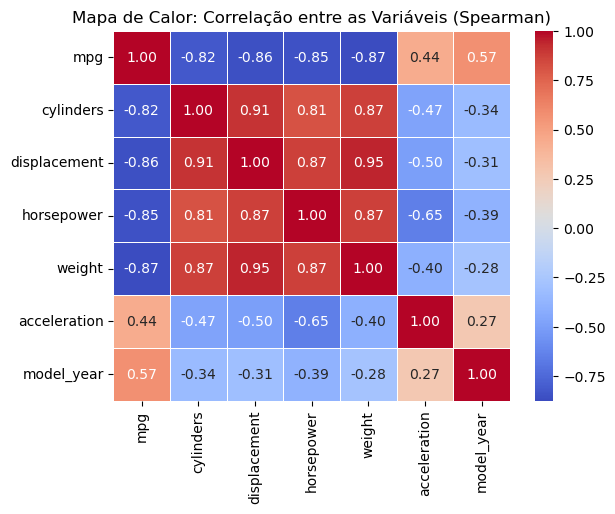

In [16]:
# Mapa de Calor (Spearman)
# Ajuste de tamanho
sns.heatmap(df_numerico.corr(method='spearman'), 
            annot=True,          # Coloca os números dentro dos quadrados
            cmap='coolwarm',     # Cores: Vermelho (forte) e Azul (inverso)
            fmt='.2f',           # Apenas 2 casas decimais
            linewidths=0.5)      # Linha fina separando os quadrados

plt.title('Mapa de Calor: Correlação entre as Variáveis (Spearman)')
plt.show()

**Exploração Visual dos Dados**

A partir das correlações de Pearson e Spearman, utilizou-se gráficos para identificar nuances omitidas pelos resumos estatísticos. Esta etapa é fundamental para detectar concentrações de registros e o impacto de valores extremos sobre o dataset.

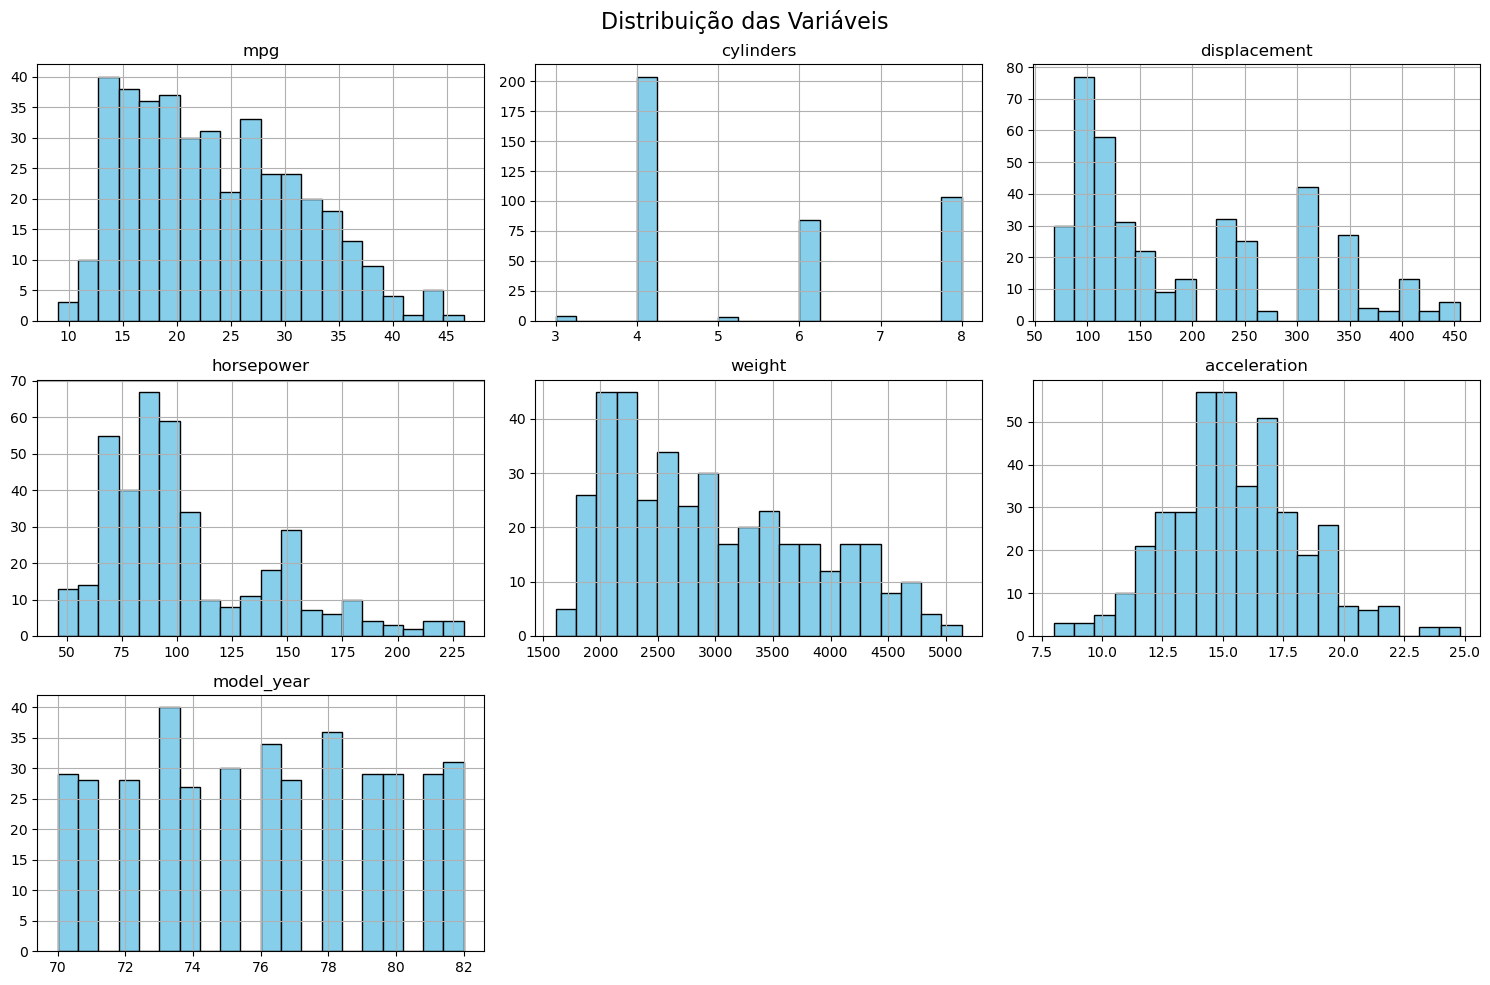

In [20]:
# Usando o df_numerico (somente com features numéricas)
df_numerico.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

plt.suptitle('Distribuição das Variáveis', fontsize=16)
plt.tight_layout() # Ajusta o espaçamento para os títulos não encavalarem
plt.show()

**Observações das Distribuições dos Histogramas**


| Variável | Perfil da Distribuição | Interpretação |
| :--- | :--- | :--- |
| **`mpg`** | Assimetria à direita | Indica que a maior parte da frota possui consumo médio/alto, com poucos veículos apresentando alta eficiência energética. |
| **`cylinders`** | Discreta (Multimodal) | Reflete as categorias padrão de motores (4, 6 e 8 cilindros), com predominância de motores de 4 cilindros na amostra. |
| **`displacement`**| Assimetria à direita | Revela uma concentração de motores de baixa cilindrada, com uma "cauda" de motores grandes que representam os veículos de maior porte. |
| **`horsepower`** | Assimetria à direita | Confirma que a maioria dos veículos possui potência moderada. Os valores extremos à direita representam os *outliers* de alta performance. |
| **`weight`** | Assimetria à direita | Demonstra que a frota é composta majoritariamente por veículos leves e médios; o peso elevado é uma característica minoritária. |
| **`acceleration`**| Normal (Sino) | Apresenta um comportamento equilibrado, onde a maioria dos veículos possui desempenho médio, com raros casos de aceleração extrema. |
| **`model_year`** | Uniforme | Indica uma coleta de dados equilibrada ao longo dos anos (1970-1982), permitindo análises temporais sem viés de época. |

> **Conclusão Visual:** A predominância de distribuições assimétricas (com "caudas" à direita) reforça que as medidas de média aritmética podem ser distorcidas por valores extremos, validando o uso da **mediana** como referência central mais fiel para este conjunto de dados.

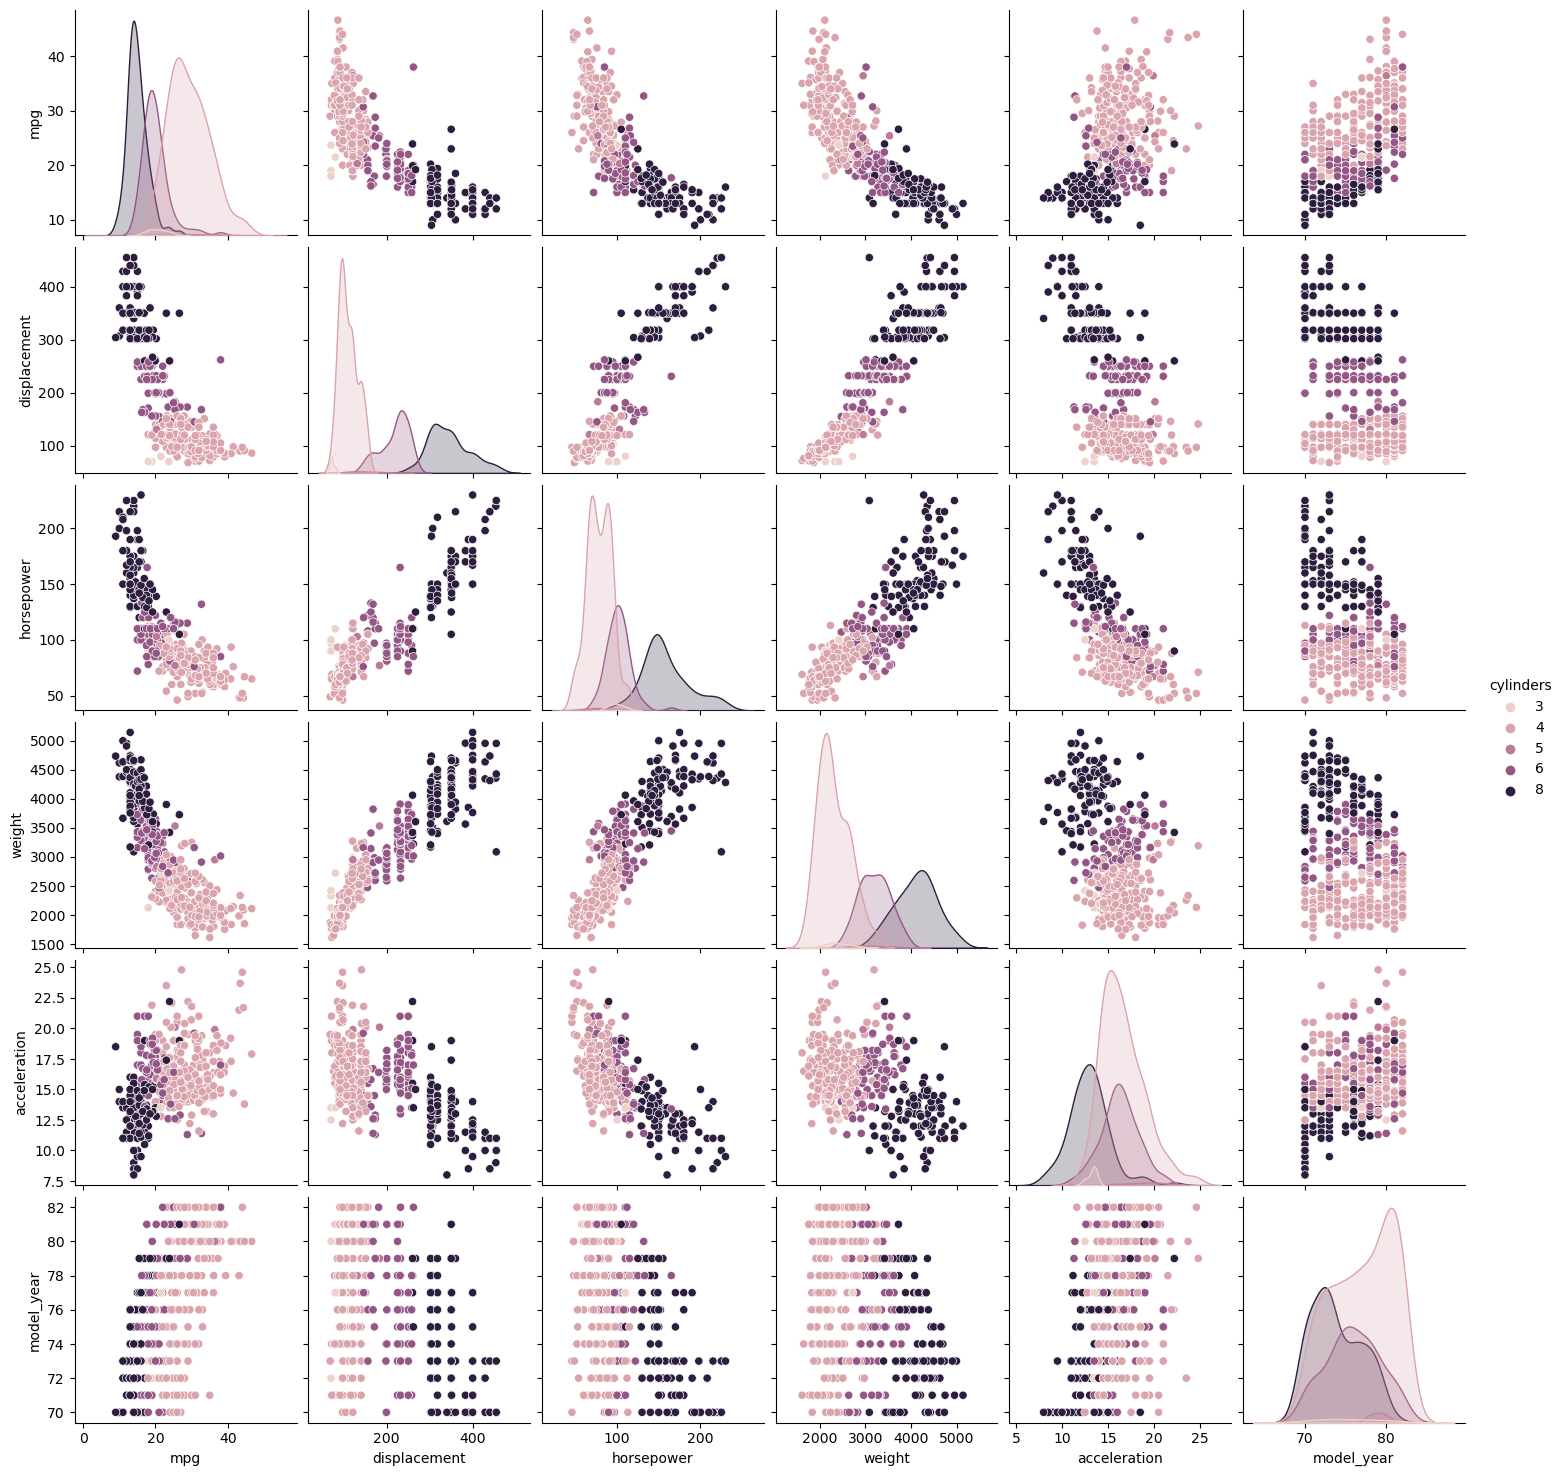

In [23]:
sns.pairplot(df_numerico, hue='cylinders')

> **Justificativa da Segmentação:** Optou-se pela variável `cylinders` para o parâmetro de cor (`hue`) devido à sua natureza discreta e ao seu forte poder de segmentação. Observa-se que o número de cilindros atua como a variável latente que define os agrupamentos de performance e eficiência energética em todo o dataset.

**Interpretação da Matriz Pairplot**


| Cruzamento (Eixos) | Comportamento Observado | Interpretação |
| :--- | :--- | :--- |
| **Diagonal (Cilindros)** | Separação clara de picos | Observa-se que os grupos de 4 e 8 cilindros quase não se misturam. Isso confirma que são opostos em termos de engenharia e performance. |
| **`weight` vs `mpg`** | Escorrega (Curva Negativa) | Identifica-se que o grupo de 8 cilindros (cor escura) concentra-se no canto inferior direito: são os carros mais pesados e que menos rendem milhas por galão. |
| **`horsepower` vs `weight`** | Subida (Linha Positiva) | Nota-se uma fila indiana bem definida: quanto mais pesado o veículo, maior a potência necessária. |
| **`acceleration` vs `mpg`** | Nuvem Dispersa (Sujos) | Observa-se uma mancha de pontos menos organizada. Isso indica que a aceleração não dita o consumo de forma tão rígida quanto o peso ou a potência. |
| **`model_year` vs `mpg`** | Subida em Degraus | Identifica-se uma leve tendência de subida dos pontos ao longo dos anos. Isso sugere que, mesmo dentro do mesmo grupo de cilindros, a eficiência melhorou com o tempo. |

> **Observação:** No cruzamento entre `displacement` e `horsepower`, os pontos formam quase uma linha perfeita. Isso prova que, neste dataset, essas duas variáveis são praticamente redundantes; ter uma no gráfico já explicaria a outra.

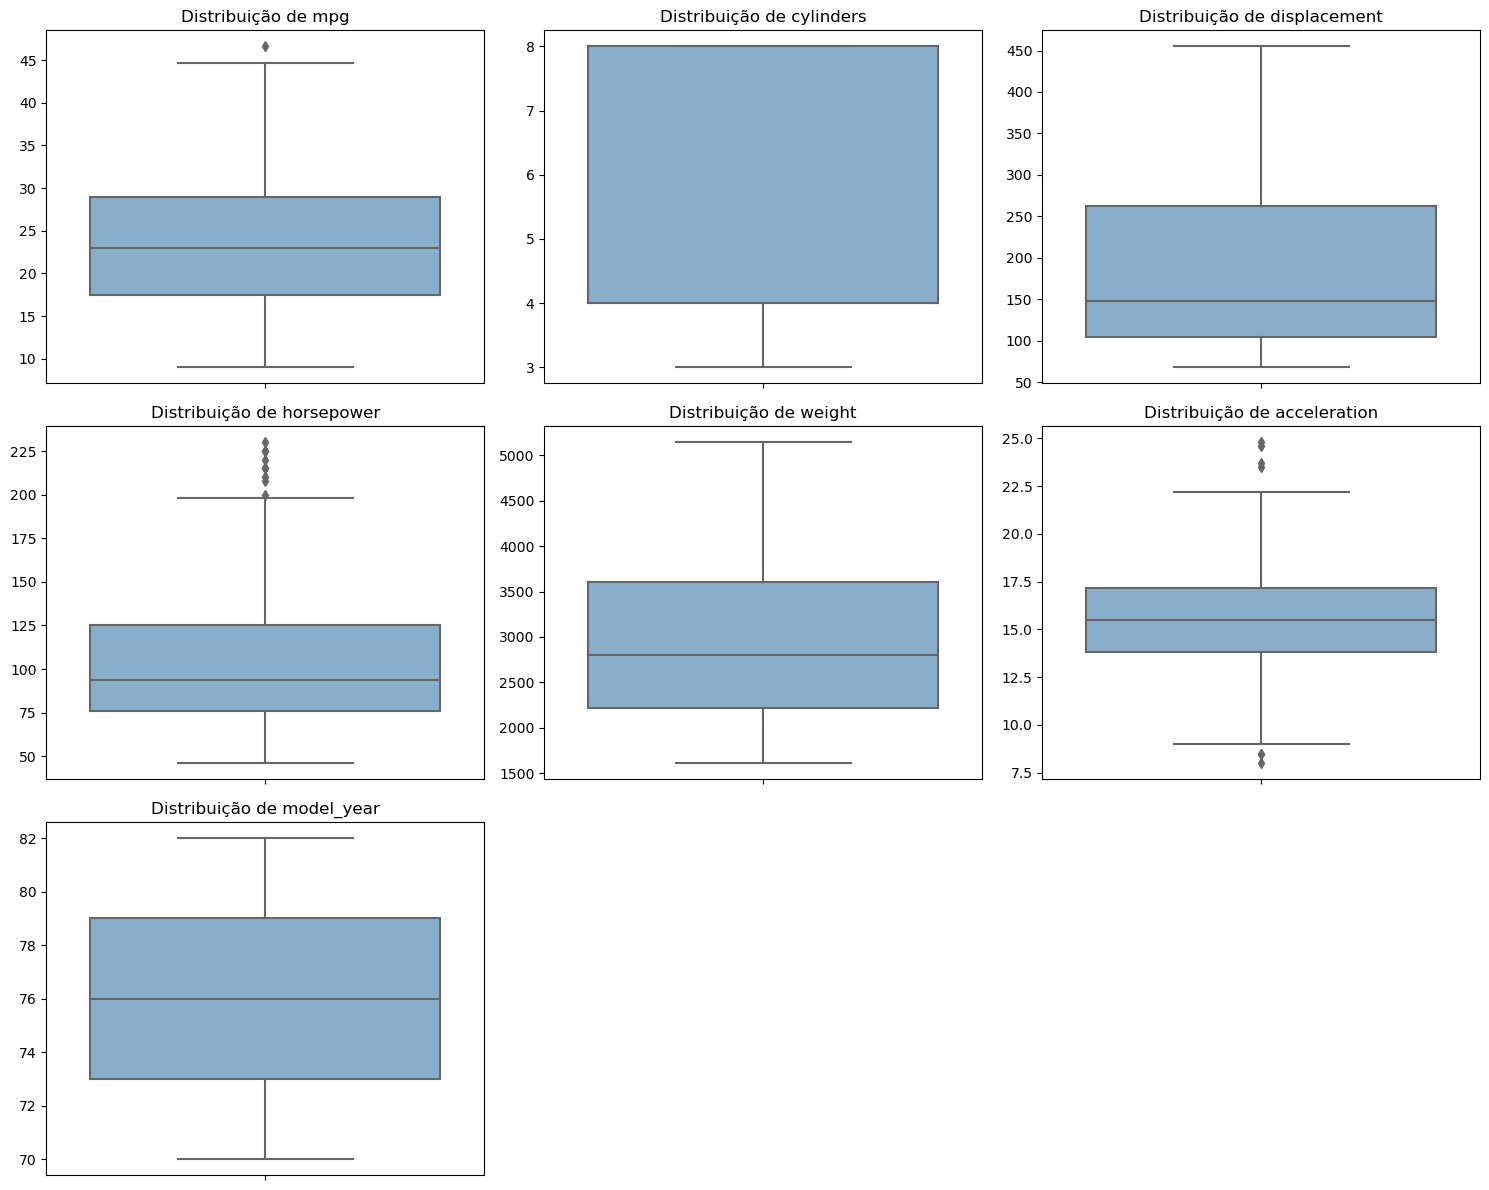

In [25]:
# Configurar a área dos gráficos (ajuste o número de linhas/colunas conforme necessidade)
plt.figure(figsize=(15, 12))

for i, coluna in enumerate(df_numerico, 1):
    plt.subplot(3, 3, i) # Cria uma grade de 3x3
    sns.boxplot(y=df[coluna], color='#7eb0d5')
    plt.title(f'Distribuição de {coluna}', fontsize=12)
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Interpretação dos boxplots**

| Variável | Observação Visual | Interpretação |
| :--- | :--- | :--- |
| **`mpg`** | Mediana deslocada para a base | Confirma que a maior parte da frota possui baixa eficiência, com a concentração de dados em valores reduzidos de consumo. |
| **`displacement`** | Caixa alongada e assimétrica | Indica uma grande disparidade entre os tamanhos de motores, com predominância de modelos menores e médios. |
| **`horsepower`** | Presença de *Outliers* no topo | Identifica veículos de alta performance que fogem do padrão da amostra, sugerindo a presença de motores esportivos ou V8. |
| **`weight`** | Grande amplitude da caixa | Revela uma frota heterogênea, composta por veículos de massas muito distintas, sem uma padronização de peso. |
| **`acceleration`** | Mediana centralizada | Demonstra que a agilidade dos veículos segue uma distribuição mais equilibrada (normal), com pouca assimetria. |
| **`model_year`** | Ausência de *Outliers* | Reitera que a coleta de dados foi consistente e homogênea ao longo de todo o período histórico (1970-1982). |

> **Conclusão Técnica:** A detecção de valores atípicos (*outliers*) em potência e aceleração indica que o uso da **Média** pode ser enganoso para estas variáveis. Recomenda-se a utilização da **Mediana** em análises comparativas para garantir maior robustez estatística.

**Criação da Razão Peso-Potência (`w/hp`)**

A criação da variável `w/hp` permite sintetizar duas características físicas (massa e potência) em um único indicador de performance. 
* **Eficiência Mecânica:** Veículos com um valor de `w/hp` mais baixo tendem a ser mais ágeis e rápidos, pois possuem mais potência disponível para cada quilo de peso.
* **Poder Preditivo:** Esta métrica é frequentemente um preditor mais robusto para o consumo de combustível e aceleração do que o peso ou a potência analisados de forma isolada, pois captura a interação dinâmica entre ambos os fatores.

In [26]:
df['w/hp'] = df['weight'] / df['horsepower']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,w/hp
0,18.0,8,307.0,130.0,3504,12.0,70,NaN,chevrolet chevelle malibu,26.953846
1,15.0,8,350.0,165.0,3693,11.5,70,NaN,buick skylark 320,22.381818
2,18.0,8,318.0,150.0,3436,11.0,70,NaN,plymouth satellite,22.906667
3,16.0,8,304.0,150.0,3433,12.0,70,NaN,amc rebel sst,22.886667
4,17.0,8,302.0,140.0,3449,10.5,70,NaN,ford torino,24.635714


**Conversão de mpg para km/L**
* 1 milha _____ 1.609384 km
* 1 galão _____ 3.785411 L

Quando divido o valor correspondente em km pelo valor também correspondente em litro (1.609384 km/3.785411 L), eu tenho o fator de correção, 1 mpg equivale a `0,4251 km/L`

In [28]:
df['km/L'] = df['mpg'] * 0.4251

<AxesSubplot:xlabel='w/hp', ylabel='km/L'>

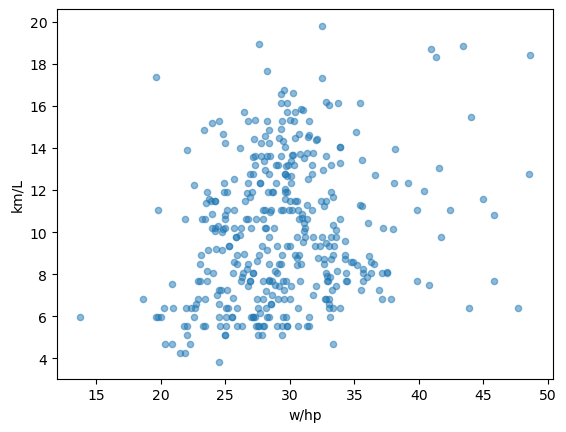

In [29]:
df.plot.scatter(x = 'w/hp', y = 'km/L', alpha = 0.5)

**Conclusões Finais**

1. **A Regra do Equilíbrio:** O consumo de combustível é ditado pela relação entre o peso do carro e a força do motor. Carros que priorizam a economia são construídos com motores menores em relação ao seu peso.
2. **O Limite da Época:** Descobrimos que a eficiência máxima dos veículos entre 1970 e 1982 ficava na casa dos 17 km/L. Nenhum carro da amostra conseguiu superar essa barreira tecnológica.
3. **Poder de Previsão:** A nova medida que criamos (`w/hp`) é a ferramenta mais poderosa que temos para entender o consumo, sendo melhor do que analisar o peso ou a potência sozinhos.